In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#CARGA DE CSVS

df_final_demo = pd.read_csv("data/df_final_demo.txt")
df_final_experiment_clients = pd.read_csv("data/df_final_experiment_clients.txt")
df_final_web_data_pt_1 = pd.read_csv("data/df_final_web_data_pt_1.txt")
df_final_web_data_pt_2 = pd.read_csv("data/df_final_web_data_pt_2.txt")

In [3]:
#LIMPIEZA CSV CLIENTES, EDAD MAYOR QUE AÑOS TRABJADOS EN AL EMPRESA Y MAYORES DE 18

df_final_demo_yr = df_final_demo[df_final_demo["clnt_age"] >= df_final_demo["clnt_tenure_yr"]]
df_final_demo_yr = df_final_demo_yr[ df_final_demo['clnt_age'] >= 18]
df_final_demo_yr = df_final_demo_yr.dropna()

C:\Users\delam\AppData\Local\Temp\ipykernel_21600\1826708145.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_final_demo_yr = df_final_demo_yr[ df_final_demo['clnt_age'] >= 18]


In [4]:
#AGRUPACION DE DOS DATASET. PART 1 Y PAR 2. REGISTROS

df_final_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], axis= 0, ignore_index= True)

In [6]:
#FUNCION PARA CALCULAR ESTADISTICAS

def estadisticas_demo(df, columna):
    media = df[columna].mean().round(2)
    median = df[columna].median()
    mode = df[columna].mode()[0]
    variance = df[columna].var().round(2)
    std_deviation = df[columna].std().round(2)
    max = df[columna].max()
    min = df[columna].min()

    print("Media: ", media)
    print("Median: ", median)
    print("Mode: ", mode)
    print("Max: ", max)
    print("Min: ", min)
    print("Variance: ", variance)
    print("Standard deviation: ", std_deviation)
   

    return

In [7]:
#USO DE FUNCION ESTADISTICAS

edad_cliente = estadisticas_demo(df_final_demo_yr, 'clnt_age')
antiguedad_meses = estadisticas_demo(df_final_demo_yr, 'clnt_tenure_mnth')
antiguedad_años = estadisticas_demo(df_final_demo_yr, 'clnt_tenure_yr')

AttributeError: 'float' object has no attribute 'round'

<Axes: xlabel='clnt_age', ylabel='Count'>

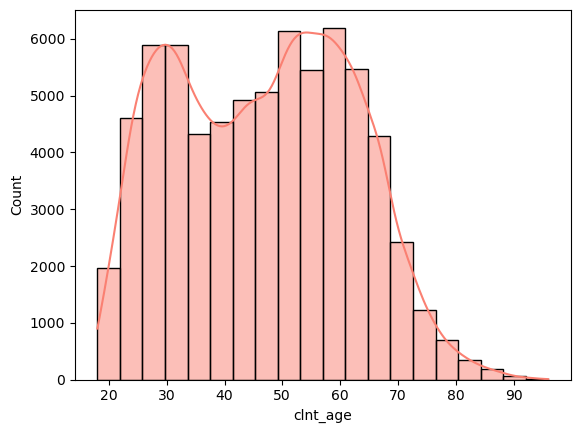

In [8]:
#HISTOGRAMA DE EDADES

sns.histplot(df_final_demo_yr['clnt_age'], kde=True, bins=20, color="salmon")

La mayor parte de operaciones se concentran en torno a los 30 y a partir de los 50 que puede coincidir en el primer caso, con gente que va teniendo mas poder adquisitivo y en el segundo gente mas proxima a la jubilación.

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

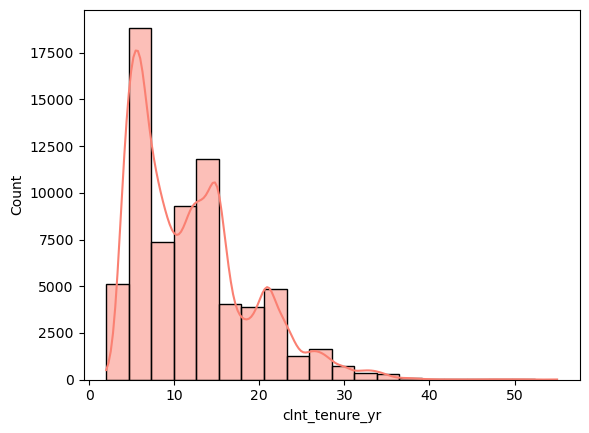

In [9]:
#HISTOGRAMA DE AÑOS TRABAJADOS

sns.histplot(df_final_demo_yr['clnt_tenure_yr'], kde=True, bins=20, color="salmon")

In [10]:
#CONTEO DE VALORES POR GENEROS

df_final_demo_yr['gendr'].value_counts()

gendr
U    23844
M    23392
F    22480
X        3
Name: count, dtype: int64

<Axes: ylabel='count'>

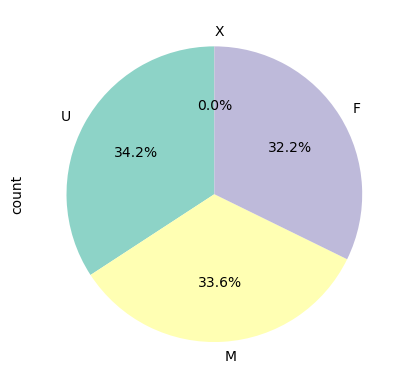

In [11]:
#DISTRIBUCION EN GRAFICA DE GENEROS

df_final_demo_yr['gendr'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

<Axes: ylabel='count'>

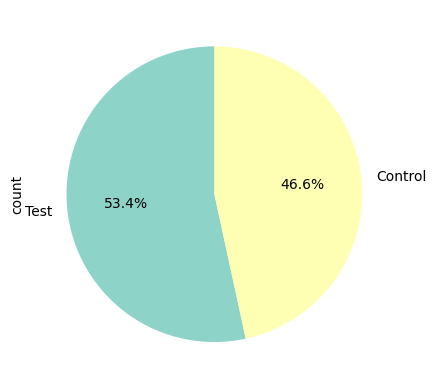

In [12]:
#DISTRIBUCION DE PARTICIPANTES EN LOS DISFERENTES TESTS

df_final_experiment_clients['Variation'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

In [13]:
#UNION DE TIPO DE TEST EN EL QUE HA PARTICIPADO CADA CLIENTE AL DF DE ACTIVIDAD/REGISTROS

df_final_web_data_final = df_final_web_data.merge(df_final_experiment_clients, on= 'client_id', how= 'left')

In [14]:
#df con todos clientes que han llegado al paso de confirm y tasa de finalizacion

df_final_confirm = df_final_web_data[df_final_web_data['process_step'] == 'confirm'].drop_duplicates('visit_id')
kpi_confirm = (df_final_confirm['client_id'].unique().sum() / df_final_web_data['client_id'].unique().sum()) * 100
kpi_confirm.round(2)

np.float64(66.96)

In [15]:
#CAMBIO DE FORMATO DE LA COLUMNA FECHA

df_final_web_data['date_time'] = pd.to_datetime(df_final_web_data['date_time'])

In [36]:
df_final_web_data['duration'] = df_final_web_data['date_time'].diff(-1).where(df_final_web_data['visit_id'] == df_final_web_data['visit_id'].shift(-1)).shift(1)